In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})
import anchor

from anchor import MODALITY_ORDER, MODALITY_PALETTE, MODALITY_TO_COLOR, MODALITY_TO_CMAP

%load_ext autoreload
%autoreload 2

# Figures in the notebook
%matplotlib inline

# Set random seed
np.random.seed(sum(map(ord, 'anchor')))



# Define folder to save figures
folder = 'pdf'
!mkdir -p $folder


/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


## Make test dataset

### Perfect modalities

In [2]:
size = 100

perfect_modalities = pd.DataFrame({'excluded': np.zeros(size), 
                                   'bimodal': np.concatenate([np.zeros(size/2), np.ones(size/2)]), 
                                   'included': np.ones(size), 'middle': 0.5*np.ones(size)})
perfect_modalities = perfect_modalities.reindex(columns=MODALITY_ORDER).dropna(how='all', axis=1)
perfect_modalities.head()

,excluded,bimodal,included,middle
0,0,0,1,0.5
1,0,0,1,0.5
2,0,0,1,0.5
3,0,0,1,0.5
4,0,0,1,0.5


### Add uniform random noise

In [3]:
import six

In [4]:
# Up to but not including the last item - "uncategorized"
violinplot_kws = dict(order=MODALITY_ORDER[:-1], palette=MODALITY_PALETTE[:-1])

figure_prefix = '{}/perfect_modalities_noisy'.format(folder)

perfect_modalities_noisy = anchor.add_noise(
    perfect_modalities, plot=False, iteration_per_noise=100, violinplot_kws=violinplot_kws, 
    figure_prefix=figure_prefix, noise_percentages=np.arange(0, 101, 5))
six.print_(perfect_modalities_noisy.shape)
perfect_modalities_noisy.head()

(100, 8004)


,excluded_noise0_iter0,bimodal_noise0_iter0,included_noise0_iter0,middle_noise0_iter0,excluded_noise5_iter0,bimodal_noise5_iter0,included_noise5_iter0,middle_noise5_iter0,excluded_noise5_iter1,bimodal_noise5_iter1,...,included_noise100_iter97,middle_noise100_iter97,excluded_noise100_iter98,bimodal_noise100_iter98,included_noise100_iter98,middle_noise100_iter98,excluded_noise100_iter99,bimodal_noise100_iter99,included_noise100_iter99,middle_noise100_iter99
0,0,0,1,0.5,0,0,1,0.5,0.000000,0.000000,...,0.104306,0.255304,0.607051,0.318675,0.278459,0.348157,0.092185,0.410834,0.720610,0.282821
1,0,0,1,0.5,0,0,1,0.5,0.000000,0.000000,...,0.024601,0.938658,0.113968,0.402693,0.769330,0.009054,0.769117,0.261010,0.299588,0.203287
2,0,0,1,0.5,0,0,1,0.5,0.000000,0.000000,...,0.132754,0.401305,0.920149,0.006544,0.684529,0.862542,0.949463,0.478771,0.903987,0.284627
3,0,0,1,0.5,0,0,1,0.5,0.000000,0.000000,...,0.006801,0.207151,0.380513,0.801769,0.305975,0.187343,0.498550,0.729321,0.892719,0.373746
4,0,0,1,0.5,0,0,1,0.5,0.129001,0.390094,...,0.845931,0.724473,0.600698,0.913603,0.556213,0.317132,0.763205,0.907491,0.130769,0.559195


### Save the test data

In [5]:
perfect_modalities_noisy.to_csv('data.csv'.format(folder))

### Plot the test data

In [6]:
tidy = perfect_modalities_noisy.unstack().reset_index()
six.print_(tidy.shape)
tidy = tidy.rename(columns={'level_0':'Feature ID', 'level_1': "Sample ID", 0: "$\Psi$"})
tidy['Iteration'] = tidy['Feature ID'].str.extract('iter(\d+)').astype(int)
tidy['% Noise'] = tidy['Feature ID'].str.extract('noise(\d+)').astype(int)
tidy['Modality'] = tidy['Feature ID'].str.split("_").str[0]

tidy.head()

(800400, 3)


,Feature ID,Sample ID,$\Psi$,Iteration,% Noise,Modality
0,excluded_noise0_iter0,0,0,0,0,excluded
1,excluded_noise0_iter0,1,0,0,0,excluded
2,excluded_noise0_iter0,2,0,0,0,excluded
3,excluded_noise0_iter0,3,0,0,0,excluded
4,excluded_noise0_iter0,4,0,0,0,excluded


In [24]:
metadata = tidy.drop_duplicates(['Feature ID'])
metadata = metadata.set_index('Feature ID')
six.print_(metadata.shape)
metadata.to_csv('metadata.csv', index_col=False)
metadata.head()

(8004, 5)


,Sample ID,$\Psi$,Iteration,% Noise,Modality
Feature ID,,,,,
excluded_noise0_iter0,0,0.0,0,0,excluded
bimodal_noise0_iter0,0,0.0,0,0,bimodal
included_noise0_iter0,0,1.0,0,0,included
middle_noise0_iter0,0,0.5,0,0,middle
excluded_noise5_iter0,0,0.0,0,5,excluded


#### Get a subset of the data for plotting

Use where:

* Noise percentage is 0, 25, 50, 75

In [7]:
rows = tidy['% Noise'].isin([0, 25, 50, 75])

tidy_subset = tidy.loc[rows]
tidy_subset.shape

(120400, 6)

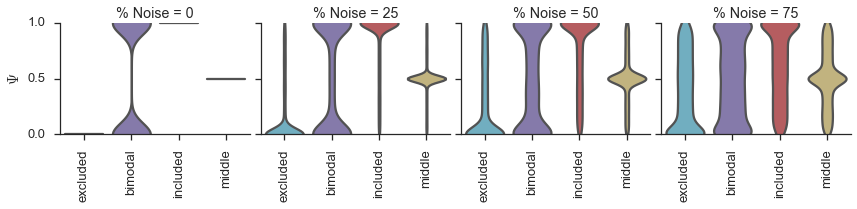

In [8]:
g = sns.factorplot(x='Modality', y='$\Psi$', col='% Noise', data=tidy_subset, size=3,
                   kind='violin', palette=MODALITY_PALETTE[:-1], order=MODALITY_ORDER[:-1], 
                   bw=0.2, inner=None, scale='width')
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=90)
g.set(ylim=(0, 1), yticks=(0, 0.5, 1), xlabel='')
g.fig.tight_layout()
g.savefig('{}/data.pdf'.format(folder))

## Save the data

In [9]:
perfect_modalities_noisy.to_csv("{}/data.csv".format(folder))

## Evaluate `anchor` on these data

In [10]:
import bonvoyage

w = bonvoyage.Waypoints()
waypoints = w.fit_transform(perfect_modalities_noisy)

In [11]:
from anchor.simulate import evaluate_estimator

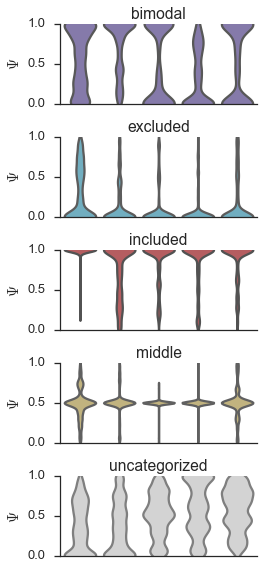

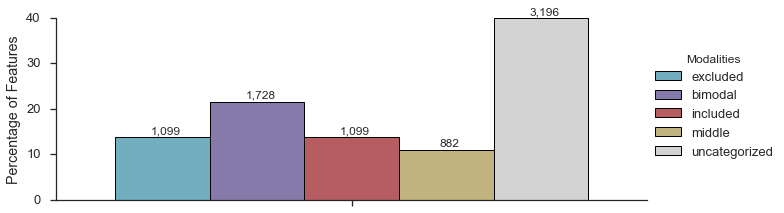

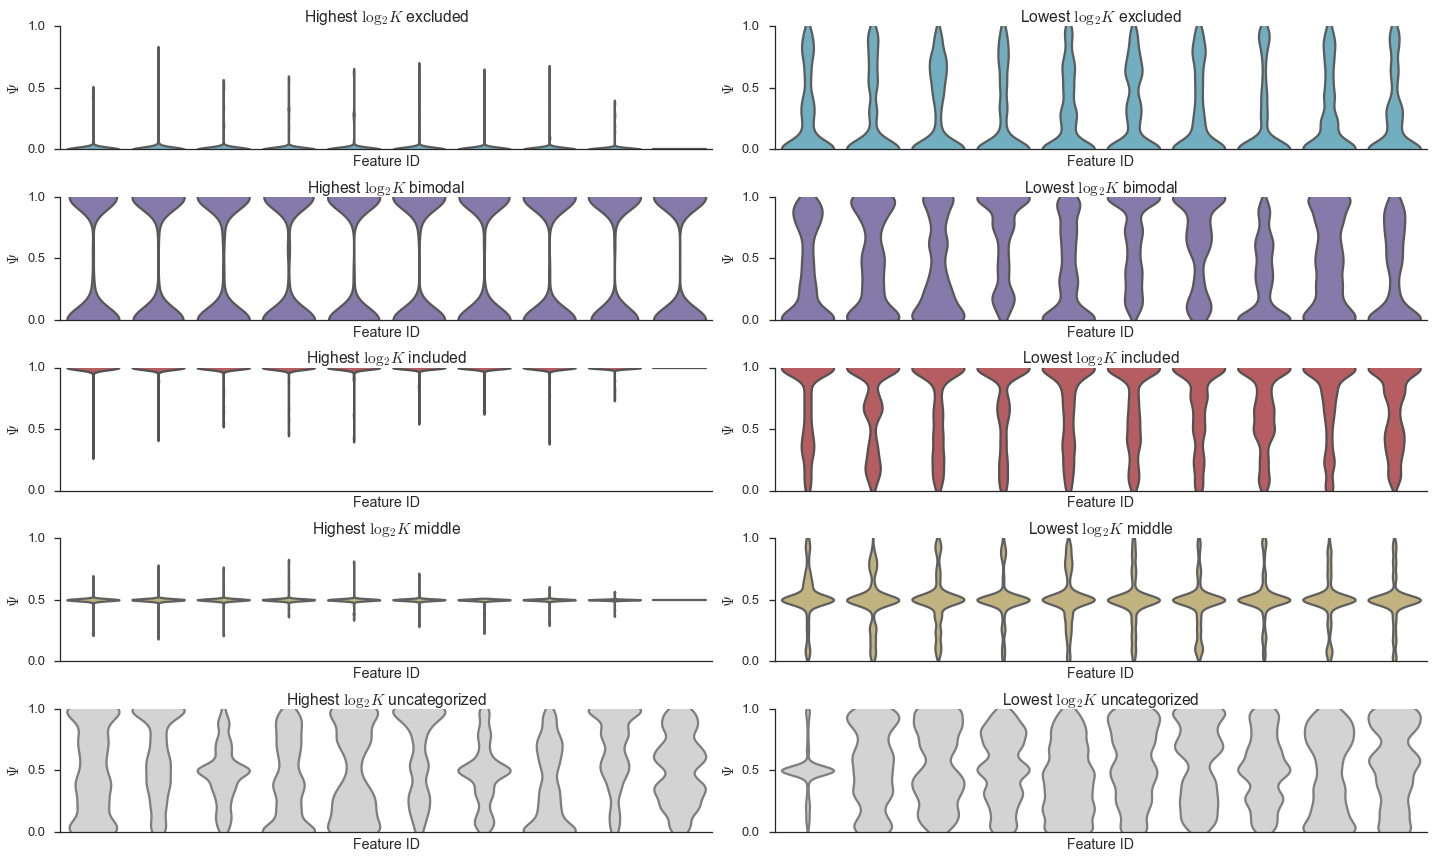

In [12]:
figure_prefix = '{}/perfect_modalities_evaluated'.format(folder)


bayesian = anchor.BayesianModalities()

result = evaluate_estimator(bayesian, perfect_modalities_noisy, waypoints, figure_prefix)

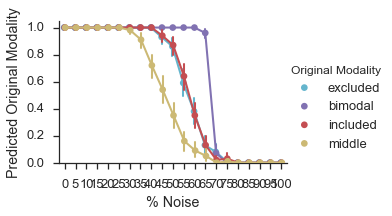

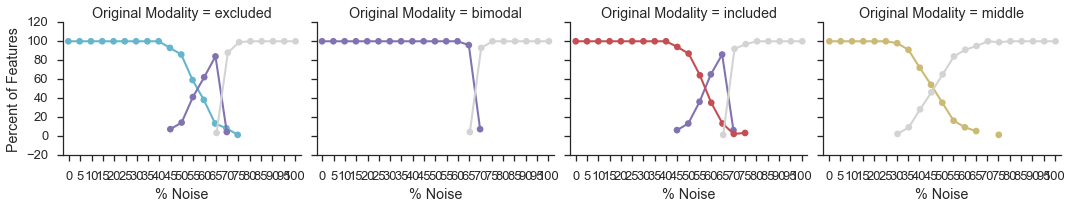

In [13]:
# Use noisy simple modalities to get correctness
predicted_df = result.predicted.reset_index()
predicted_df = predicted_df.rename(columns={'index': 'Feature ID', 0: "Predicted Modality"})
predicted_df['Original Modality'] = predicted_df['Feature ID'].str.split('_').str[0]
predicted_df['% Noise'] = predicted_df['Feature ID'].str.extract('noise(\d+)').astype(int)
predicted_df['Predicted Original Modality'] = predicted_df['Predicted Modality'] == predicted_df['Original Modality']
predicted_df.head()
g = sns.factorplot(x='% Noise', y='Predicted Original Modality', data=predicted_df, hue="Original Modality",
               hue_order=MODALITY_ORDER[:-1], palette=MODALITY_PALETTE[:-1], aspect=1.5, dodge=True, size=3, scale=0.5)
g.set(ylim=(0, 1.05))
g.savefig('{}_percent_predicted_original_modality_from_noise.pdf'.format(figure_prefix))


predicted_counts = predicted_df.groupby(['Original Modality', 'Predicted Modality', "% Noise"]).size()
predicted_counts = predicted_counts.reset_index()
predicted_counts = predicted_counts.rename(columns={0: 'Features'})
predicted_counts['Percent of Features'] = predicted_counts.groupby(
    ['Original Modality', '% Noise'], as_index=False, group_keys=False).apply(
    lambda x: 100*x['Features']/x['Features'].sum())

g = sns.factorplot(x='% Noise', hue='Predicted Modality', y='Percent of Features', 
               col='Original Modality', col_order=MODALITY_ORDER[:-1],
               data=predicted_counts, kind='point', #col_wrap=2, 
               hue_order=MODALITY_ORDER, size=3, scale=0.5, dodge=True,
               palette=MODALITY_PALETTE, aspect=1.25, legend=False)
g.savefig('{}_percent_predicted_modality_with_noise.pdf'.format(figure_prefix))

In [14]:
predicted_df.head()

,Feature ID,Predicted Modality,Original Modality,% Noise,Predicted Original Modality
0,excluded_noise0_iter0,excluded,excluded,0,True
1,bimodal_noise0_iter0,bimodal,bimodal,0,True
2,included_noise0_iter0,included,included,0,True
3,middle_noise0_iter0,middle,middle,0,True
4,excluded_noise5_iter0,excluded,excluded,5,True


In [16]:
predicted_df.to_csv('bayesian_modality_predictions.csv', index=False)